## **ML-Model to detect gender age based on his/her voice**   
In this notebook, I am using a common-voice dataset to train a model for detecting age of
a person based on his/her voice

### **Stepwise ML-model development**  
This notebook is created for beginners to develop age detection ml-model with stepwise approach using common-voice dataset.
The notebook include following steps:
* Data Collection
* Data Pre-processing
* Feature Engineering
* Model Selection
* Model Analysis
* Model Deployment

In [1]:
is_kaggle = True
if is_kaggle:
    test_location = "../input/common-voice/cv-valid-test.csv"
    train_location = "../input/common-voice/cv-valid-train.csv"
    test_file_location = "/kaggle/input/common-voice/cv-valid-test/"
    train_file_location = "/kaggle/input/common-voice/cv-valid-train/"
else:
    test_location = "/content/drive/MyDrive/Data/Diss/cv-valid-test.csv"
    train_location = "/content/drive/MyDrive/Data/Diss/cv-valid-train.csv"
    train_file_location = "/content/drive/MyDrive/Data/Diss/train/"
    test_file_location = "/content/drive/MyDrive/Data/Diss/cv-valid-test/"


In [2]:
if is_kaggle == False:
    from google.colab import drive
    drive.mount('/content/drive')

### **Step-01 Data Collection**  
In this step the data is loaded and explored. The data is understood with basic graphs and to check if the dataset is balanced.

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns # visualizing data with stunning default theme
import sklearn # contain algorithms
import warnings
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, log_loss, recall_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')

# load dataset from input directory
df = pd.read_csv(train_location)
df[df['age'].notna()].head()
df = df.sample(frac=0.5, random_state=42)
print(len(df))
df.tail()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


97888


,filename,text,up_votes,down_votes,age,gender,accent,duration
78187,cv-valid-train/sample-078187.mp3,it's candice now on long distance from washington,2,0,thirties,male,NaN,NaN
174455,cv-valid-train/sample-174455.mp3,that was until the site was blocked,1,0,NaN,NaN,NaN,NaN
53942,cv-valid-train/sample-053942.mp3,i can't think of any reason why she was killed,2,0,thirties,male,us,NaN
151070,cv-valid-train/sample-151070.mp3,don't say that again,2,0,NaN,NaN,NaN,NaN
179005,cv-valid-train/sample-179005.mp3,i'm going to go back to doing just what i did ...,3,0,NaN,NaN,NaN,NaN


In [4]:
df_test = pd.read_csv(test_location)
df_test[df_test['age'].notna()].tail()

,filename,text,up_votes,down_votes,age,gender,accent,duration
3976,cv-valid-test/sample-003976.mp3,we've got her located,1,0,thirties,male,england,NaN
3979,cv-valid-test/sample-003979.mp3,she has all your features,1,0,thirties,male,NaN,NaN
3980,cv-valid-test/sample-003980.mp3,i've got to see nicole right away,1,0,fifties,male,australia,NaN
3984,cv-valid-test/sample-003984.mp3,but there were certain of them who took a bit ...,2,0,thirties,male,NaN,NaN
3989,cv-valid-test/sample-003989.mp3,i'm playing for keeps,2,0,fifties,male,australia,NaN


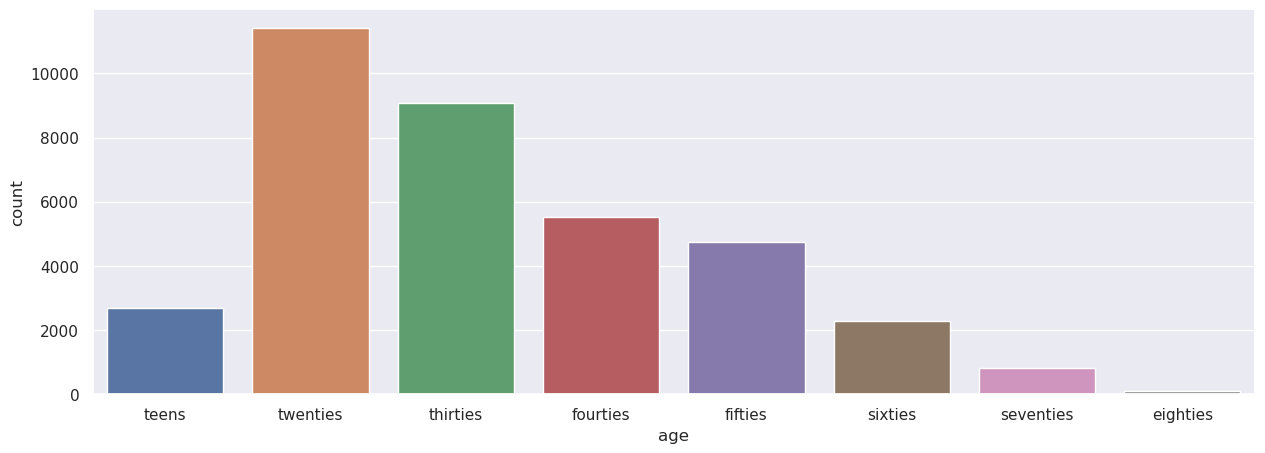

In [5]:
sns.set(rc={'figure.figsize':(15, 5)})
sns.countplot(x="age",
        data=df[df['age'].notna()],
        order=['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties'])

plt.show()


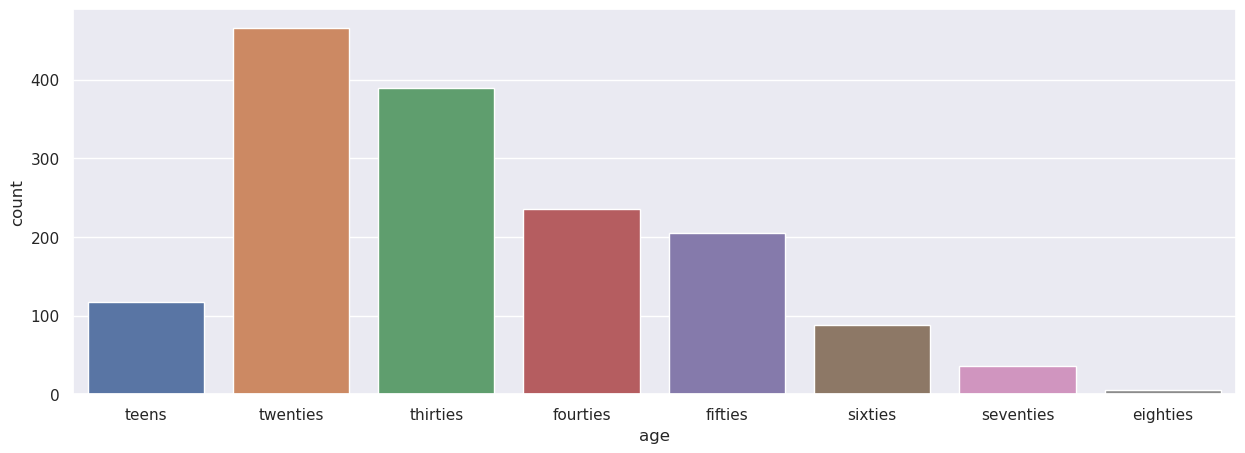

In [6]:
sns.set(rc={'figure.figsize':(15, 5)})
sns.countplot(x="age",
        data=df_test[df_test['age'].notna()],
        order=['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties'])

plt.show()

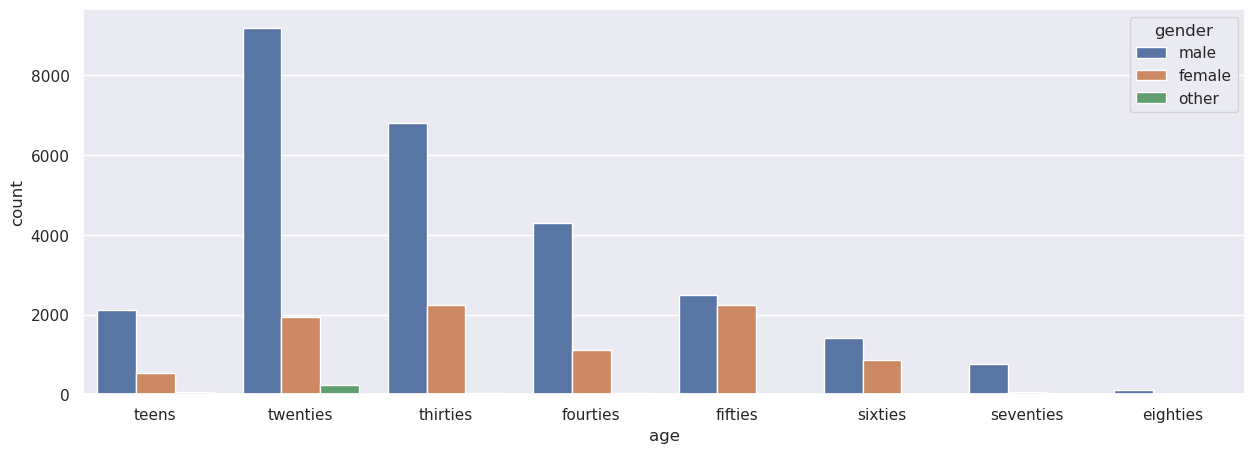

In [7]:
sns.countplot(x="age",
        hue='gender',
        data=df[df['age'].notna()],
        order=['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties'])

plt.show()

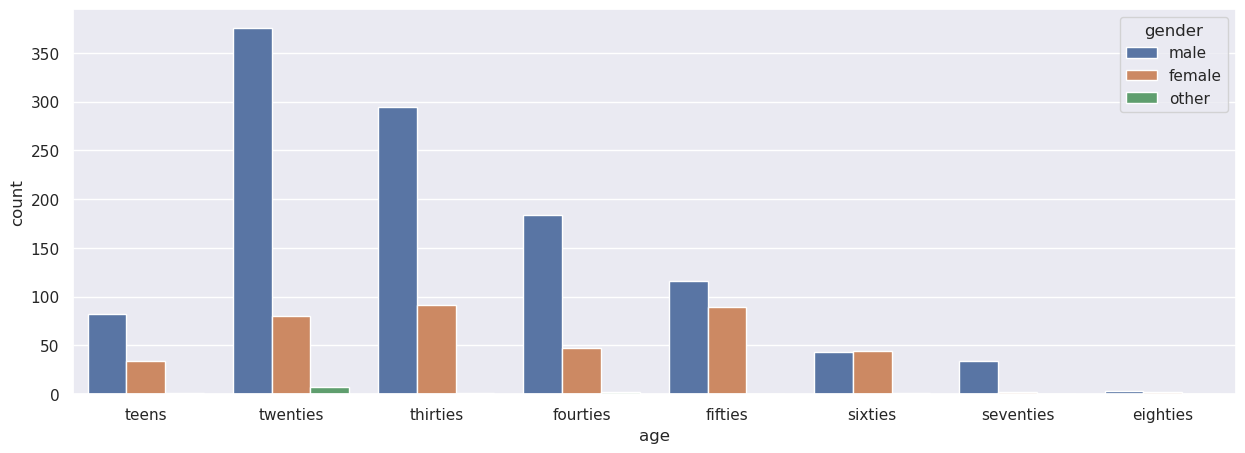

In [8]:
sns.countplot(x="age",
        hue='gender',
        data=df_test[df_test['age'].notna()],
        order=['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties'])

plt.show()

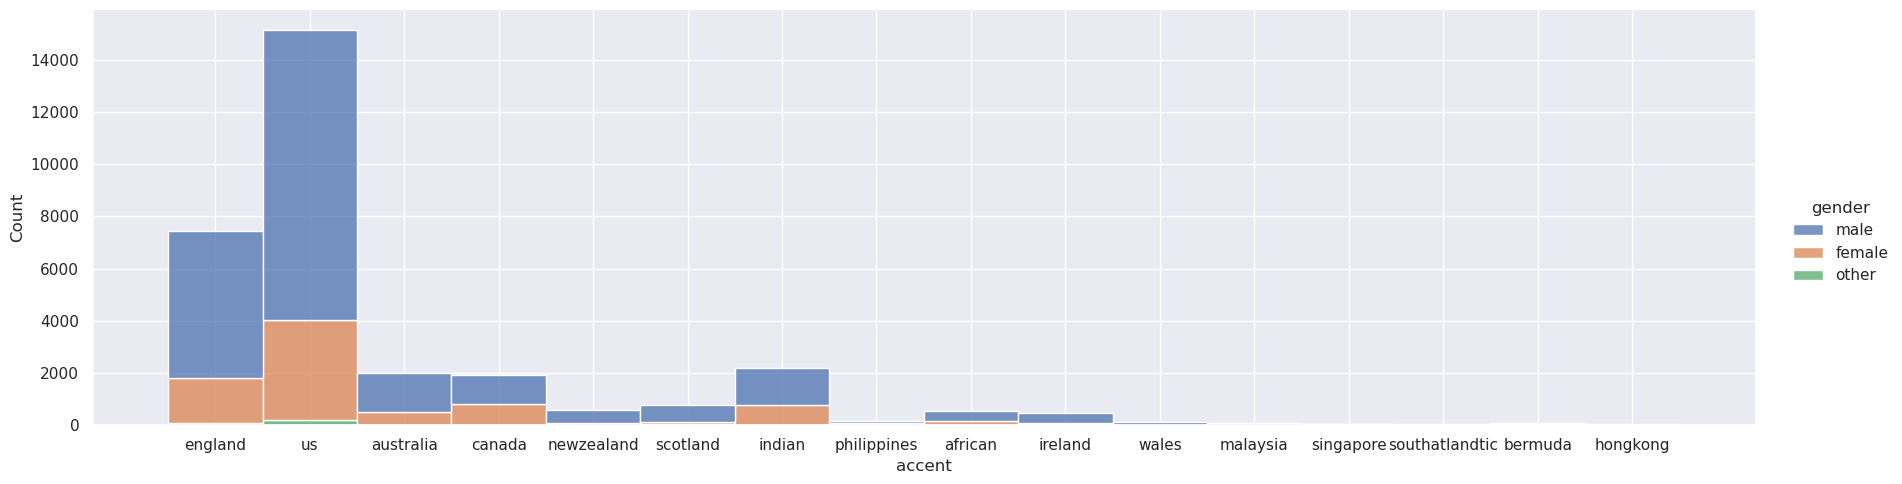

In [9]:
sns.displot(x="accent",
        data=df[df['accent'].notna()],
        hue='gender',
        multiple='stack',
        height=5, aspect=18/5)

plt.show()

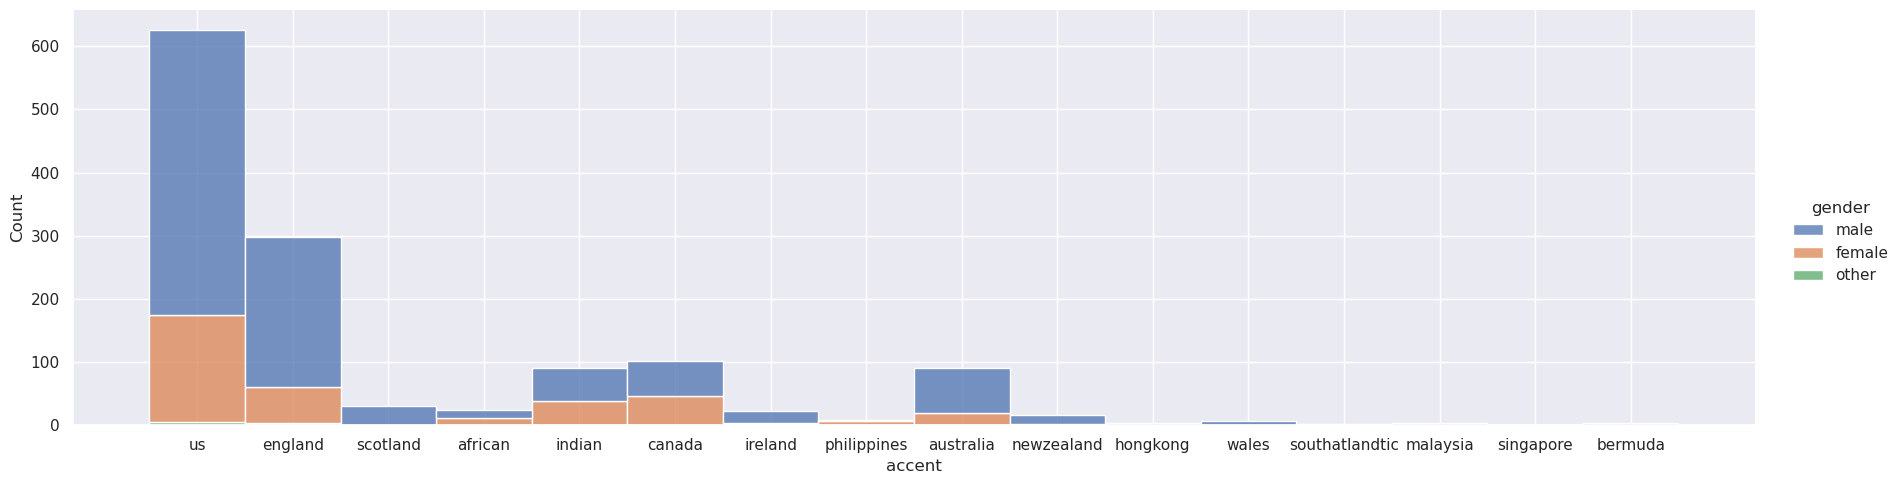

In [10]:
sns.displot(x="accent",
        data=df_test[df_test['accent'].notna()],
        hue='gender',
        multiple='stack',
        height=5, aspect=18/5)

plt.show()

initial: (97888, 8) final: (31434, 8)


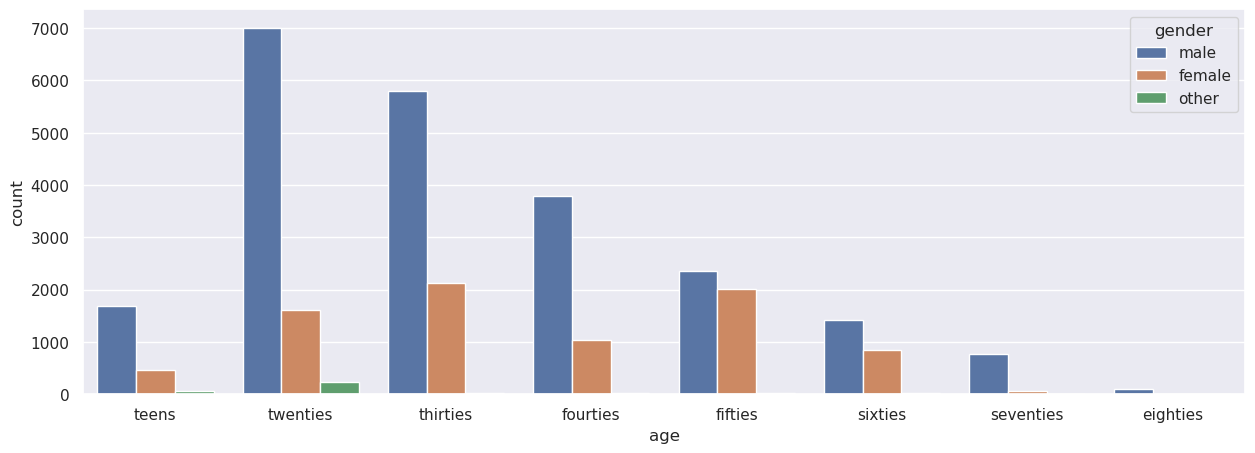

In [11]:
#del df['duration']
start=df.shape
#df.isna().sum()
end = df[df['age'].notna()& df['gender'].notna() & df['accent'].notna()].shape
print("initial: {} final: {}".format(start, end))
sns.countplot(x="age",
        hue='gender',
        data=df[df['age'].notna()& df['gender'].notna() & df['accent'].notna()],
        order=['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties'])

plt.show()

initial: (3995, 8) final: (1320, 8)


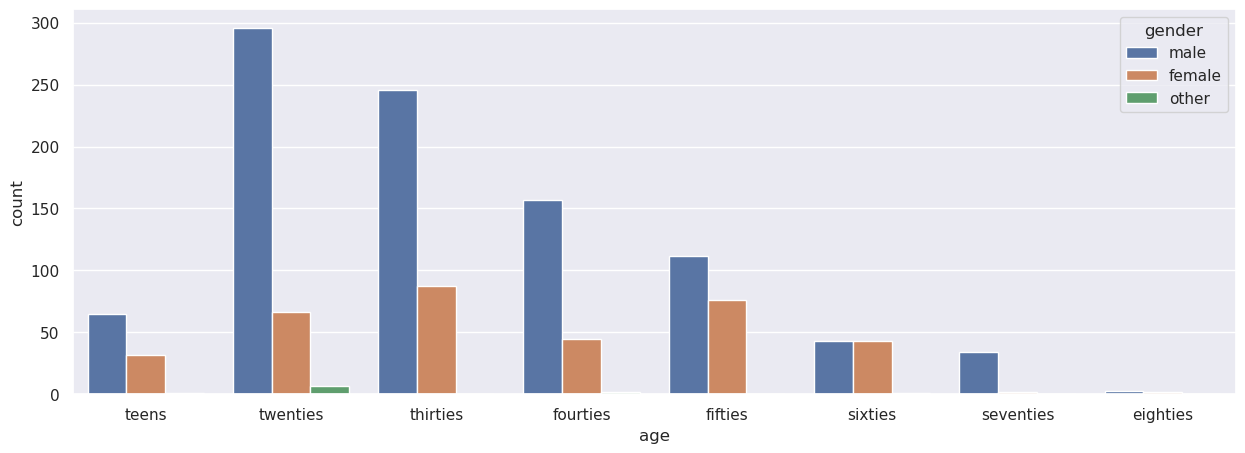

In [12]:
#del df['duration']
start=df_test.shape
#df.isna().sum()
end = df_test[df_test['age'].notna()& df_test['gender'].notna() & df_test['accent'].notna()].shape
print("initial: {} final: {}".format(start, end))
sns.countplot(x="age",
        hue='gender',
        data=df_test[df_test['age'].notna()& df_test['gender'].notna() & df_test['accent'].notna()],
        order=['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties'])

plt.show()

#### **First-step findings**
We understood the dataset and also found that the dataset is imbalance. To refine the dataset for ml-model, we need to perform pre-processing in next-step.

### Data Pre-processing  
#### Data Cleaning  
In this step we drop entries(samples) with NaN values. The columns that doesn't contribute(unnecessary) to the model are removed. The attributes are checked for its datatypes and changed to an approapriate type.

In [13]:
#we extract the columns that we think useful are
df = df[['filename','age','gender']]
#To clean the data we remove the sample with NaN attribute values.
data = df[df['age'].notna() & df['gender'].notna()]
data.reset_index(inplace=True, drop=True)
data.head()

,filename,age,gender
0,cv-valid-train/sample-114956.mp3,fourties,male
1,cv-valid-train/sample-030866.mp3,twenties,male
2,cv-valid-train/sample-157709.mp3,thirties,female
3,cv-valid-train/sample-080130.mp3,twenties,male
4,cv-valid-train/sample-009434.mp3,thirties,male


In [14]:
#we extract the columns that we think useful are
df_test = df_test[['filename','age','gender']]
#To clean the data we remove the sample with NaN attribute values.
data_test = df_test[df_test['age'].notna() & df_test['gender'].notna()]
data_test.reset_index(inplace=True, drop=True)
data_test.head()

,filename,age,gender
0,cv-valid-test/sample-000001.mp3,twenties,male
1,cv-valid-test/sample-000003.mp3,twenties,male
2,cv-valid-test/sample-000005.mp3,twenties,male
3,cv-valid-test/sample-000006.mp3,twenties,male
4,cv-valid-test/sample-000007.mp3,thirties,male


In [15]:
#data['gender'] = pd.to_numeric(data['gender'],errors = 'coerce')
#data.dtypes
#if the below code fail to covert gender datatype and values then uncomment above code
cleanup_nums = {"gender": {"male":1,"female":0,"other":0.5}}
data = data.replace(cleanup_nums)
data.head()

,filename,age,gender
0,cv-valid-train/sample-114956.mp3,fourties,1.0
1,cv-valid-train/sample-030866.mp3,twenties,1.0
2,cv-valid-train/sample-157709.mp3,thirties,0.0
3,cv-valid-train/sample-080130.mp3,twenties,1.0
4,cv-valid-train/sample-009434.mp3,thirties,1.0


In [16]:
#data['gender'] = pd.to_numeric(data['gender'],errors = 'coerce')
#data.dtypes
#if the below code fail to covert gender datatype and values then uncomment above code
cleanup_nums = {"gender": {"male":1,"female":0,"other":0.5}}
data_test = data_test.replace(cleanup_nums)
data_test.head()

,filename,age,gender
0,cv-valid-test/sample-000001.mp3,twenties,1.0
1,cv-valid-test/sample-000003.mp3,twenties,1.0
2,cv-valid-test/sample-000005.mp3,twenties,1.0
3,cv-valid-test/sample-000006.mp3,twenties,1.0
4,cv-valid-test/sample-000007.mp3,thirties,1.0


### **Feature Engineering**
#### **Feature Extraction**

We extract the following features:  
The following features are related to audio quality through which the model will learn more effectively. In this project it is not necessary to have good knowledge about the given audio features.
**Gender**
* **Spectral Centroid**: each frame of a magnitude spectrogram is normalized and treated as a distribution over frequency bins, from which the mean (centroid) is extracted per frame
* **Spectral Bandwidth**: compute 2nd-order spectral bandwidth
* **Spectral Rolloff**: the center frequency for a spectrogram bin such that at least roll_percent (0.85 by default) of the energy of the spectrum in this frame is contained in this bin and the bins below
* **Mel Frequency Cepstral Coefficients (MFCCs)**: a small set of 20 features that describe the overall shape of a spectral envelope

**Librosa package**  
Librosa is a Python package for music and audio analysis. It provides the building blocks necessary to create the music information retrieval systems. Librosa helps to visualize the audio signals and also do the feature extractions in it using different signal processing techniques.

In [17]:
import librosa
ds_path = train_file_location
ds_path_test = test_file_location

print(len(data))

def update_train_file_path(path):
    if is_kaggle:
        return path
    file_parts = path.split('/')
    last_part = file_parts[len(file_parts)-1]
    parts = last_part.split('.')
    parts = parts[0].split('-')
    file_parts.insert(len(file_parts)-1, str(int(parts[1])//1000))
    return '/'.join(file_parts)

#this function is used to extract audio frequency features
def feature_extraction(data, ds_path, filename, sampling_rate=48000, isTraining =  False):
    path = "{}{}".format(ds_path, filename)
    if isTraining == True:
        path =  update_train_file_path(path)
    features = list()
    audio, _ = librosa.load(path, sr=sampling_rate)

    gender = data[data['filename'] == filename].gender.values[0]
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=audio, sr=sampling_rate))
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=audio, sr=sampling_rate))
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=audio, sr=sampling_rate))
    features.append(gender)
    features.append(spectral_centroid)
    features.append(spectral_bandwidth)
    features.append(spectral_rolloff)

    mfcc = librosa.feature.mfcc(y=audio, sr=sampling_rate)
    for el in mfcc:
        features.append(np.mean(el))

    return features


features = feature_extraction(data, ds_path, data.iloc[0]['filename'], isTraining = True )
print("features: ", features)

36534
features:  [1.0, 4601.892546693295, 4184.876829294083, 8874.338942307691, -402.84665, 99.38197, 4.188054, 26.407892, -19.884447, 27.224535, -21.590702, 13.456141, -11.481952, 2.3348002, -2.8148396, 0.8494334, -1.5375873, -0.5713484, 8.321047, -11.83835, 3.9674804, -5.628197, -0.041303664, -5.6541157]


In [18]:
features_test = feature_extraction(data_test, ds_path_test, data_test.iloc[0]['filename'])
print("features: ", features_test)

features:  [1.0, 2363.1105869782687, 2442.0145621564366, 4577.484631147541, -485.9729, 120.06984, 18.925766, 22.316969, 26.170475, 10.456684, 1.5410587, 7.424353, 2.6522818, -9.54947, -1.2842348, 4.510566, -3.8151226, -5.117503, 0.8494205, -0.35997397, -1.1878362, 2.7727106, 0.4317596, -4.4032865]


In [19]:
#the function create dataframe to store the feature and label related to each other
def create_df_features(orig, ds_path, isTraining = False):
    new_rows = list()
    tot_rows = len(orig)-1
    stop_counter = 55001

    for idx, row in orig.iterrows():
        if idx >= stop_counter: break
        print("\r", end="")
        print("{}/{}".format(idx, tot_rows), end="", flush=True)
        features = feature_extraction(orig, ds_path, row['filename'], isTraining  = isTraining)
        features.append(row['age'])
        new_rows.append(features)

    return pd.DataFrame(new_rows, columns=["gender", "spectral_centroid", "spectral_bandwidth", "spectral_rolloff",
                                    "mfcc1", "mfcc2", "mfcc3", "mfcc4", "mfcc5", "mfcc6", "mfcc7", "mfcc8",
                                   "mfcc9", "mfcc10", "mfcc11", "mfcc12", "mfcc13", "mfcc14", "mfcc15", "mfcc16",
                                   "mfcc17", "mfcc18", "mfcc19", "mfcc20", "label"])

df_features = create_df_features(data, ds_path, isTraining = True)
df_features.head()

36533/36533

,gender,spectral_centroid,spectral_bandwidth,spectral_rolloff,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,1.0,4601.892547,4184.876829,8874.338942,-402.846649,99.381973,4.188054,26.407892,-19.884447,27.224535,...,0.849433,-1.537587,-0.571348,8.321047,-11.838350,3.967480,-5.628197,-0.041304,-5.654116,fourties
1,1.0,2287.110065,2410.712019,4503.499717,-374.544037,119.650620,-8.716018,44.255966,28.027670,34.503090,...,-11.060529,-2.205300,0.734262,-9.192008,-2.799100,-5.585814,-2.370799,6.278462,2.681469,twenties
2,0.0,2143.145131,1883.691525,3939.783309,-359.217804,118.844490,-14.806021,22.941675,21.304485,-8.363414,...,-11.471552,-9.679022,-16.488588,-8.958996,-3.920002,-6.187822,-3.866070,-6.310972,-4.986303,thirties
3,1.0,1719.269771,1411.006731,2833.510540,-471.531097,146.751495,-11.641893,-1.372401,11.657462,-2.695865,...,-1.671170,-3.220754,-14.940415,-5.016739,-2.220733,-7.465117,1.860558,1.334682,-6.402274,twenties
4,1.0,2295.454960,1604.937919,3914.242788,-450.363251,114.169662,0.962597,34.766132,9.955236,-15.582076,...,-4.480816,-8.718718,-3.577431,1.816039,-8.556527,0.398287,3.121161,-5.817390,-1.272127,thirties


In [20]:
df_features_test = create_df_features(data_test, ds_path_test)
df_features_test.head()

1534/1534

,gender,spectral_centroid,spectral_bandwidth,spectral_rolloff,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,1.0,2363.110587,2442.014562,4577.484631,-485.972900,120.069839,18.925766,22.316969,26.170475,10.456684,...,4.510566,-3.815123,-5.117503,0.849420,-0.359974,-1.187836,2.772711,0.431760,-4.403286,twenties
1,1.0,2644.264959,2748.468148,5367.187500,-588.103088,106.388893,19.169491,25.312468,1.020321,20.175329,...,-6.859980,-7.951331,-8.337333,-6.856142,-2.805744,-6.419114,-6.350869,-1.939447,-2.964418,twenties
2,1.0,2059.264935,2027.237487,3844.232695,-401.671204,132.308975,7.677215,19.505114,20.168219,10.824321,...,-2.037062,-0.507063,-3.501943,-4.953253,-6.940827,-5.202406,-0.321907,-3.445682,-5.890697,twenties
3,1.0,3490.665602,3096.615650,6684.172124,-559.588562,89.208626,-12.495049,32.540150,12.109186,10.346272,...,0.535925,1.264716,-1.473101,0.517995,-0.558837,-3.706164,2.706611,-0.375905,-3.455411,twenties
4,1.0,3158.136064,3213.745972,6322.884909,-402.182495,120.924423,-16.121973,37.154160,-4.684889,18.873652,...,0.667729,2.254137,0.661788,2.334560,-3.770767,4.463132,-4.322121,3.768255,1.248358,thirties


### **Feature Transformation**  

Scaling the features with the scikit-learn StandardScaler.

In [21]:
from sklearn.preprocessing import StandardScaler

def scale_features(data):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(np.array(data.iloc[:, 0:-1], dtype = float))
    # with data.iloc[:, 0:-1] we don't consider the label column

    return scaled_data, scaler

x, scaler = scale_features(df_features)

In [22]:
x_test, scaler_test = scale_features(df_features_test)

In [23]:
print("Before scaling:", df_features.iloc[0].values[:-1])
print("\nAfter scaling:", x[0])

Before scaling: [1.0 4601.892546693295 4184.876829294083 8874.338942307691 -402.84665
 99.38197 4.188054 26.407892 -19.884447 27.224535 -21.590702 13.456141
 -11.481952 2.3348002 -2.8148396 0.8494334 -1.5375873 -0.5713484 8.321047
 -11.83835 3.9674804 -5.628197 -0.041303664 -5.6541157]

After scaling: [ 0.58319888  2.39561301  2.58350897  2.47169213  0.43742948 -0.68373212
  0.37862138  0.22139497 -2.04780053  1.40858321 -1.93527917  1.87255877
 -0.94784406  1.08508174  0.12197277  0.98635957  0.10544966  0.9934895
  2.43248928 -2.0743466   1.80024193 -1.00963205  0.42112908 -0.4583941 ]


In [24]:
print("Before scaling:", df_features_test.iloc[0].values[:-1])
print("\nAfter scaling:", x_test[0])

Before scaling: [1.0 2363.1105869782687 2442.0145621564366 4577.484631147541 -485.9729
 120.06984 18.925766 22.316969 26.170475 10.456684 1.5410587 7.424353
 2.6522818 -9.54947 -1.2842348 4.510566 -3.8151226 -5.117503 0.8494205
 -0.35997397 -1.1878362 2.7727106 0.4317596 -4.4032865]

After scaling: [ 0.59267161 -0.46478879 -0.18435579 -0.37729002 -0.44959953  0.18464545
  1.12581512 -0.07350017  1.35867595  0.17771246  0.35270005  1.1685427
  0.75499396 -0.60268244  0.33905996  1.68261538 -0.34345582  0.03250538
  0.80625176  0.63848811  0.49938952  1.09684138  0.54508808 -0.11098082]


In [25]:
df_features['label'].unique()

array(['fourties', 'twenties', 'thirties', 'fifties', 'sixties', 'teens',
       'seventies', 'eighties'], dtype=object)

In [26]:
df_features_test['label'].unique()

array(['twenties', 'thirties', 'fifties', 'fourties', 'teens',
       'seventies', 'sixties', 'eighties'], dtype=object)

In [27]:
from sklearn.preprocessing import LabelEncoder

def get_labels(data):
    labels = data.iloc[:, -1]
    encoder = LabelEncoder()
    labels = encoder.fit_transform(labels)
    return labels, encoder

y, encoder = get_labels(df_features)
classes = encoder.classes_
print("Before encoding:", df_features.iloc[0].values[-1])
print("\nAfter encoding:", y[0])
print("\nClasses:", classes)

Before encoding: fourties

After encoding: 2

Classes: ['eighties' 'fifties' 'fourties' 'seventies' 'sixties' 'teens' 'thirties'
 'twenties']


In [28]:
y_testt, encoder_test = get_labels(df_features_test)
classes_test = encoder_test.classes_
print("Before encoding:", df_features_test.iloc[0].values[-1])
print("\nAfter encoding:", y_testt[0])
print("\nClasses:", classes_test)

Before encoding: twenties

After encoding: 7

Classes: ['eighties' 'fifties' 'fourties' 'seventies' 'sixties' 'teens' 'thirties'
 'twenties']


### **Feature Selection**  

We use the ANOVA (ANalysis Of VAriance) statistical technique (f_classif) to select the best 22 features.


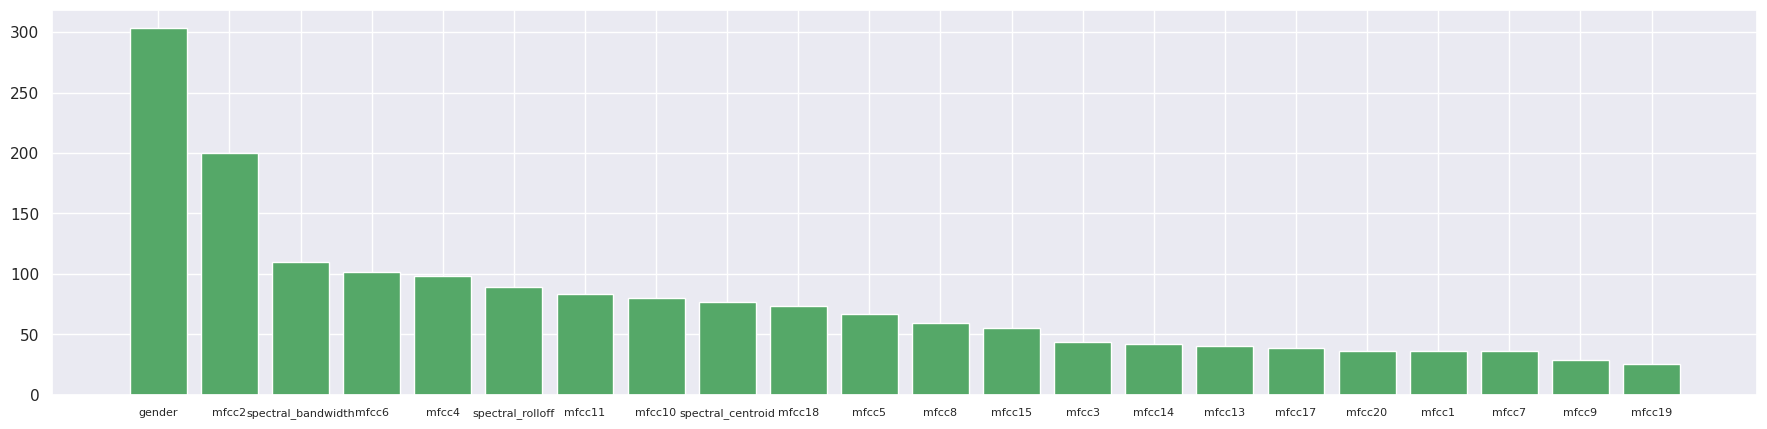

In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

n_features = 22

f_selector = SelectKBest(f_classif, k=n_features).fit(x, y)
X_new = f_selector.transform(x)
scores = f_selector.scores_

indices = np.argsort(scores)[::-1]

features = []
for i in range(n_features):
    features.append(df_features.columns[indices[i]])

plt.figure(figsize=(22, 5))
plt.bar(features, scores[indices[range(n_features)]], color='g')
plt.xticks(fontsize=8)
plt.show()


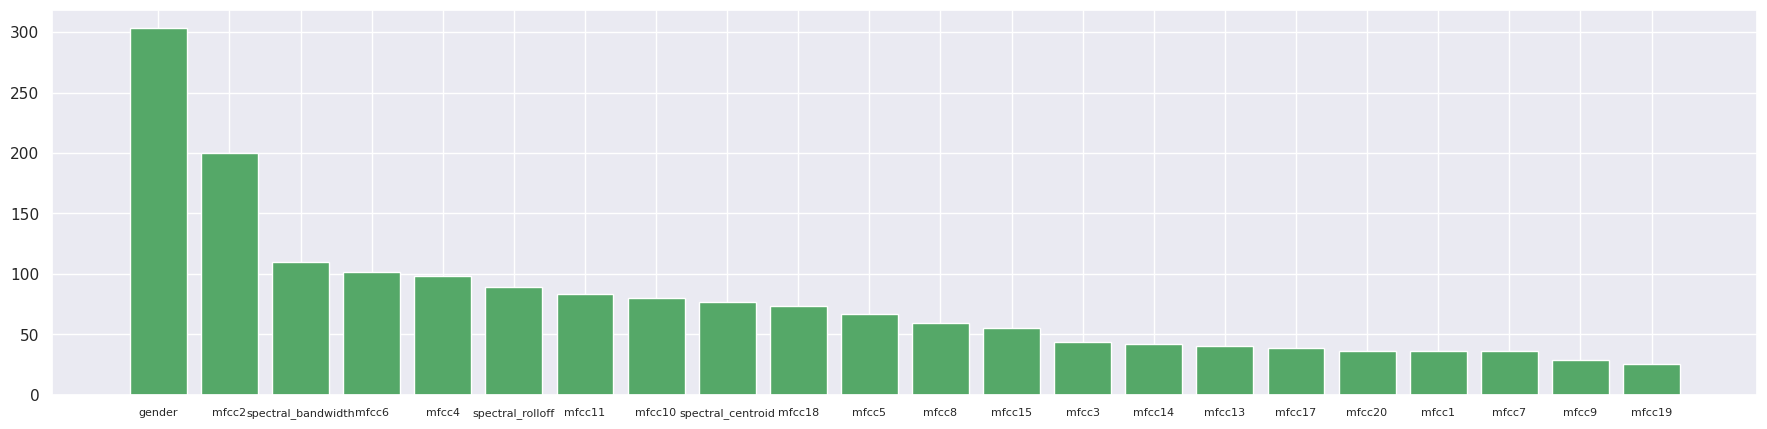

In [30]:
X_new_test = f_selector.transform(x_test)
scores_test = f_selector.scores_

indices_test = np.argsort(scores_test)[::-1]

features_test = []
for i in range(n_features):
    features_test.append(df_features_test.columns[indices_test[i]])

plt.figure(figsize=(22, 5))
plt.bar(features_test, scores_test[indices[range(n_features)]], color='g')
plt.xticks(fontsize=8)
plt.show()

### **Model Selection**  

Here, we consider two classifiers:

    Support Vector Machine
    Random Forest

We evaluate them with the K-Fold Cross-Validation technique. At each iteration of this outer cross-validation process, we tune the hyper-parameters of the classifiers with another (inner) Cross-Validation process , that will further divide the training set into training and validation data.

At each iteration of the outer CV process, we print the F1-Score obtained by the tuned classifier on the validation data, but also the F1-Score computed on the test data. Finally, we print the average F1-Scores computed on the test data at each step of the outer CV process.

In [31]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score



classifiers_and_params = [
    (SVC(), {'C': [100], 'gamma': ['auto', 'scale']}),
    (RandomForestClassifier(), {'n_estimators': [75,100,125,150]}),
    (GradientBoostingClassifier(), {'n_estimators': [200], 'learning_rate':[1.0], 'max_depth':[5,6,7], 'random_state':[0]})
]

for tup in classifiers_and_params:
    print("{}".format(tup[0].__class__.__name__))

    gs = GridSearchCV(tup[0], tup[1], scoring='f1_macro', cv=3, refit=True)
    res = gs.fit(X_new, y)

    # get the best model, re-fit on the whole training set
    best_model = res.best_estimator_


    # evaluation on the test set
    pred = best_model.predict(X_new_test)
    score = f1_score(y_testt, pred, average='macro')

    print("Best Params {} with F1 Score {:.3f}, F1 Score on Test data {:.3f}"
            .format( res.best_params_, res.best_score_, score))

SVC
Best Params {'C': 100, 'gamma': 'auto'} with F1 Score 0.799, F1 Score on Test data 0.820
RandomForestClassifier
Best Params {'n_estimators': 150} with F1 Score 0.692, F1 Score on Test data 0.714
GradientBoostingClassifier
Best Params {'learning_rate': 1.0, 'max_depth': 5, 'n_estimators': 200, 'random_state': 0} with F1 Score 0.374, F1 Score on Test data 0.305


In [32]:
classifiers_and_params = [
    (DecisionTreeClassifier(), {'criterion':["entropy","gini"],
          'max_depth': list(range(9,11)),
         'min_samples_split': list(range(2,3)),
         'min_samples_leaf': list(range(2,3))}),
    (KNeighborsClassifier(), {'n_neighbors': list(range(2,5)),
          'weights': ['distance'],
          'algorithm':['auto'],
         'metric': ['minkowski'],
         'leaf_size':list(range(1,3))}),
    (GaussianNB(), {'var_smoothing': np.logspace(0,-9, num=100)})
]

for tup in classifiers_and_params:
    print("{}".format(tup[0].__class__.__name__))

    gs = GridSearchCV(tup[0], tup[1], scoring='f1_macro', cv=3, refit=True)
    res = gs.fit(X_new, y)

    # get the best model, re-fit on the whole training set
    best_model = res.best_estimator_


    # evaluation on the test set
    pred = best_model.predict(X_new_test)
    score = f1_score(y_testt, pred, average='macro')

    print("Best Params {} with F1 Score {:.3f}, F1 Score on Test data {:.3f}"
            .format( res.best_params_, res.best_score_, score))

DecisionTreeClassifier
Best Params {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2} with F1 Score 0.400, F1 Score on Test data 0.362
KNeighborsClassifier
Best Params {'algorithm': 'auto', 'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 2, 'weights': 'distance'} with F1 Score 0.846, F1 Score on Test data 0.845
GaussianNB
Best Params {'var_smoothing': 5.336699231206313e-06} with F1 Score 0.230, F1 Score on Test data 0.230


In [33]:
def test_model(model, X_train, Y_train, X_test, Y_test):
    print("{}".format(model.__class__.__name__))
    model.fit(X_train, Y_train)

    # evaluation on the test set
    pred = model.predict(X_test)
    score = f1_score(Y_test, pred, average='macro')

    print("F1 Score on Test data {:.3f}"
            .format(score))

rf = RandomForestClassifier(n_estimators=100)
test_model(rf,X_new,y,X_new_test,y_testt)

svc = SVC(C=100,gamma="scale")
test_model(svc,X_new,y,X_new_test,y_testt)

gb = GradientBoostingClassifier(learning_rate=1.0, max_depth=6, n_estimators=200, random_state=0)
test_model(gb,X_new,y,X_new_test,y_testt)


RandomForestClassifier
F1 Score on Test data 0.680
SVC
F1 Score on Test data 0.820
GradientBoostingClassifier
F1 Score on Test data 0.413


In [34]:
import itertools
import matplotlib.pyplot as plt

def my_plot_confusion_matrix(cm, classes, normalize=False):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = "Normalized Confusion Matrix"
    else:
        title = "Confusion Matrix (without normalization)"

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.title(title)

    thresh = cm.max() / 2.
    fmt = "{:0.2f}" if normalize else "{:d}"
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, fmt.format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


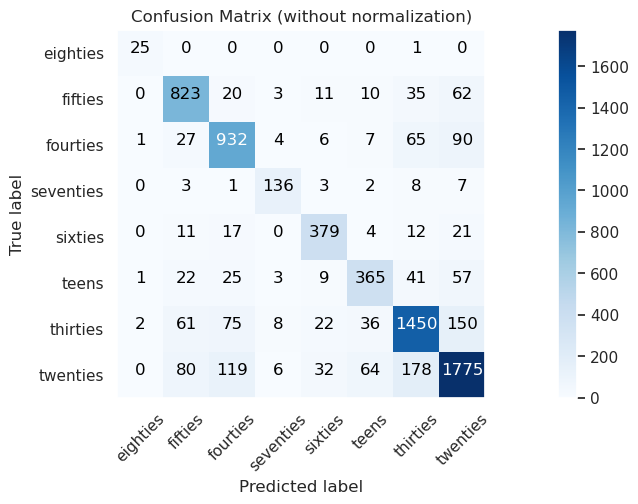

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=0)

model = SVC(C=100, gamma='scale')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure()
my_plot_confusion_matrix(cm, classes=classes)

plt.grid(False)
plt.show()

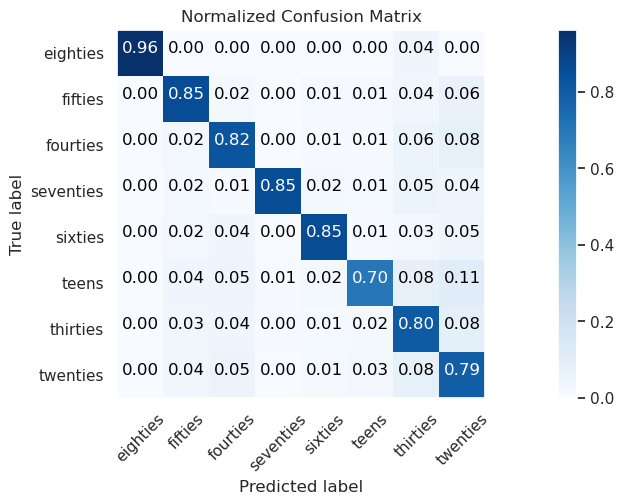

In [36]:
# Plot normalized confusion matrix
plt.figure()
my_plot_confusion_matrix(cm, classes=classes, normalize=True)

plt.grid(False)
plt.show()

